## Colorado Air Temperature Data

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Air Temperature and Precipitation Data for Pueblo Memorial Airport, CO

In [2]:
# Weather Station: Pueblo Memorial Airport, CO
# Station Summary at NOAA website: https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00093058/detail

df_pueblo = pd.read_csv('data/airtemp_precip_data/pueblo.csv')

# Filtering the data to required columns
df_pueblo = df_pueblo[['DATE', 'PRCP', 'TMAX', 'TMIN']]

# Converting the date column to datetime format
df_pueblo['DATE'] = pd.to_datetime(df_pueblo['DATE'])

# Extracting date from datetime
df_pueblo['DATE'] = df_pueblo['DATE'].dt.date 

# Replacing the NaN values with 0
df_pueblo.fillna(0.0, inplace=True)

# Rename the columns for easier future reference
df_pueblo.rename(columns={'DATE': 'date', 
                          'PRCP': 'precip', 
                          'TMAX': 'max_temp', 
                          'TMIN': 'min_temp'}, inplace=True)

# display the first few rows of the dataframe
df_pueblo.head()

/var/folders/_k/j4vqx09n5w9_n6hz8pj6_0d40000gn/T/ipykernel_48915/2520334795.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pueblo['DATE'] = pd.to_datetime(df_pueblo['DATE'])


,date,precip,max_temp,min_temp
0,2009-01-01,0.00,65,24
1,2009-01-02,0.00,65,28
2,2009-01-03,0.00,58,23
3,2009-01-04,0.02,24,16
4,2009-01-05,0.00,50,6


### Air Temperature and Precipitation Data Analysis for Pueblo Memorial Airport, CO

In [5]:
## Summary of the data for Pueblo, CO
df_pueblo[['precip', 'min_temp', 'max_temp']].describe()

,precip,min_temp,max_temp
count,5517.000000,5517.000000,5517.000000
mean,0.031441,36.889795,70.269712
std,0.131870,18.496207,20.200144
min,0.000000,-21.000000,2.000000
25%,0.000000,22.000000,56.000000
50%,0.000000,36.000000,72.000000
75%,0.000000,54.000000,87.000000
max,2.760000,74.000000,108.000000


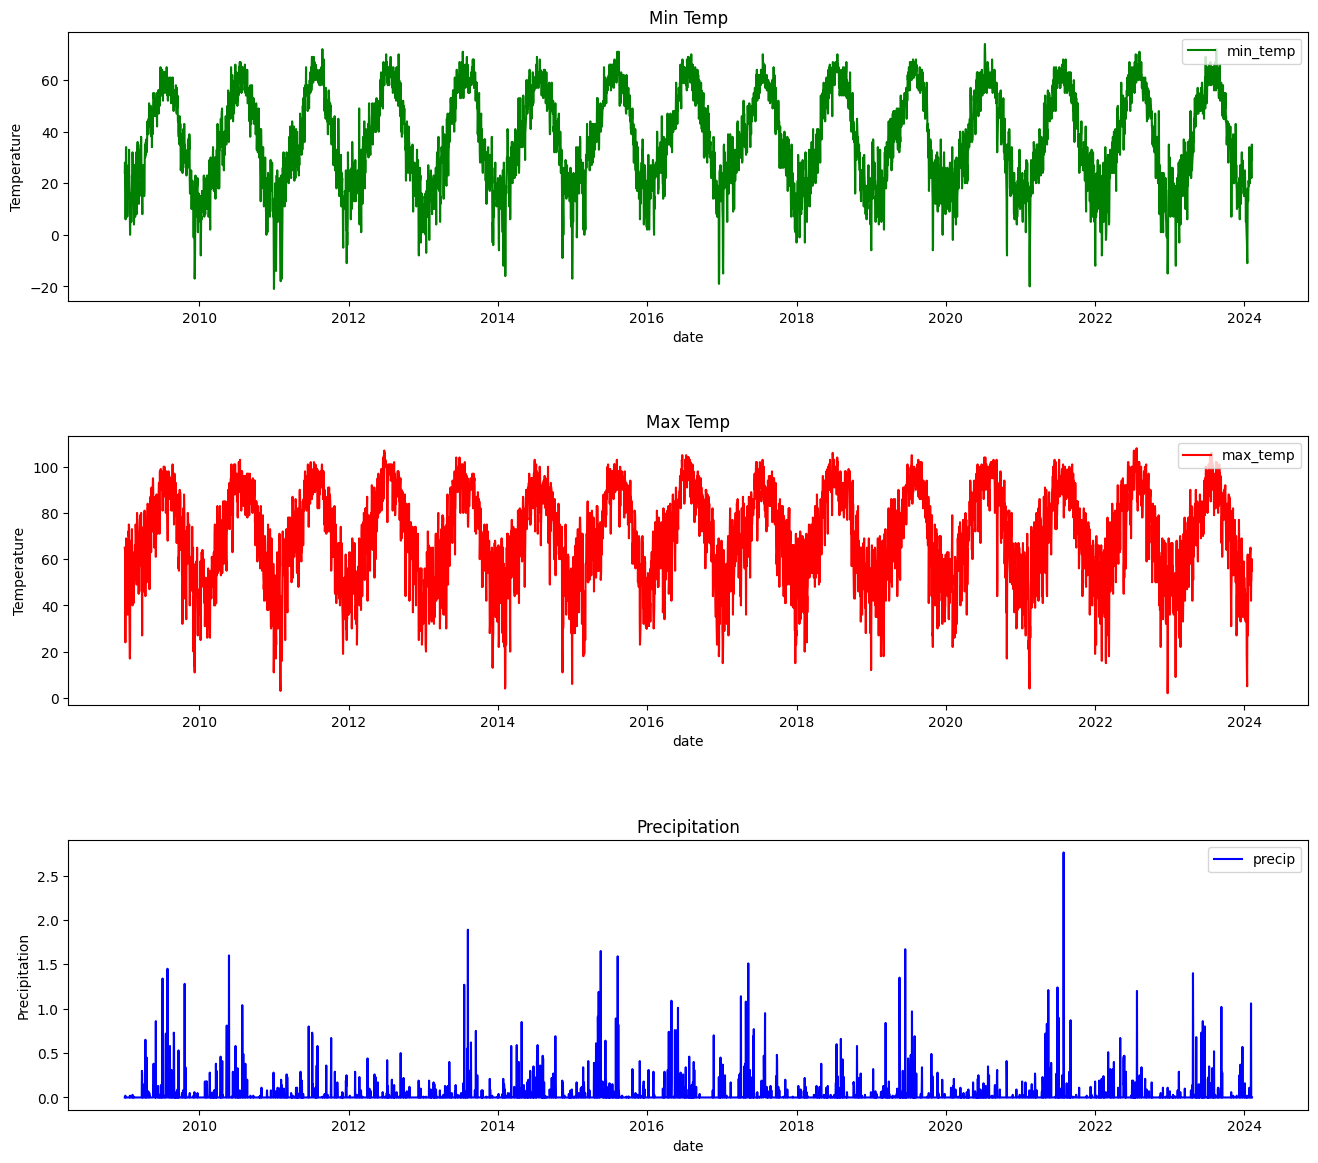

In [6]:
# Plotting time series of min_temp, max_temp and precip for Pueblo, CO

# creating a 3x1 grid of subplots and create time series plots for min_temp, max_temp and precip
fig, ax = plt.subplots(3, 1, figsize=(16, 14))

# adjusting the space between the subplots
plt.subplots_adjust(hspace=0.5)

df_pueblo.plot(x='date', y='min_temp', ax=ax[0], color='green')
ax[0].set_title('Min Temp')
ax[0].set_ylabel('Temperature')

df_pueblo.plot(x='date', y='max_temp', ax=ax[1], color='red')
ax[1].set_title('Max Temp')
ax[1].set_ylabel('Temperature')

df_pueblo.plot(x='date', y='precip', ax=ax[2], color='blue')
ax[2].set_title('Precipitation')
ax[2].set_ylabel('Precipitation')

# placing legend on top right of the subplots
for i in range(3):
    ax[i].legend(loc='upper right')

plt.show()

In [11]:
# Saving the dataframes as parquet files for future use

df_pueblo.to_parquet('data/airtemp_precip_data/pueblo.parquet')